In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r'C:\Users\Ahmed Yasser\Desktop\Sales_Coffe\clean&analysis\cleaning_data.csv');

In [11]:
df_2024 = df[df['Date'].dt.year == 2024]
df_2024.describe()
std = df['Money'].std()
AVG = df_2024['Money'].mean()
CV = std / AVG
rate_std_percent = CV * 100
round(rate_std_percent,2)

np.float64(15.89)

Text(0, 0.5, 'Price')

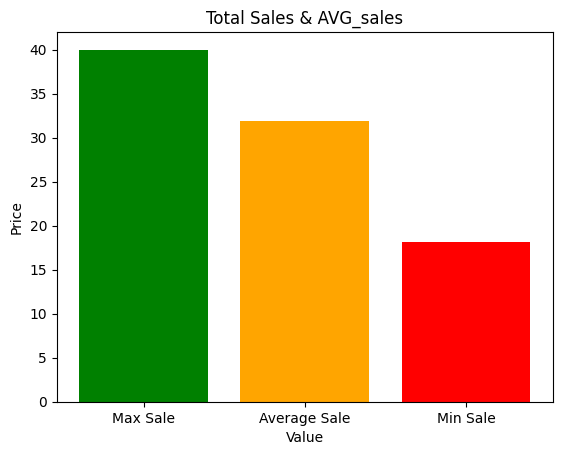

In [9]:
# Total Sales & AVG_sales 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
data_2024 = df[(df['Date'].dt.year == 2024)]
top_sales = round((data_2024['Money'].max()),2)
AVG_sales = round((data_2024['Money'].mean()),2)
min_sales = round((data_2024['Money'].min()),2)
colors = ['green', 'orange', 'red']
labels=['Max Sale', 'Average Sale', 'Min Sale']
plt.bar(labels,[top_sales,AVG_sales,min_sales],color=colors);
plt.title('Total Sales & AVG_sales')
plt.xlabel('Value')
plt.ylabel('Price')

In [125]:
# Best drinks selling per day of the week by count ?
day_totals = df.groupby('Day of week')['Coffee_name'].count().sort_values(ascending=False)
sorted_days = day_totals.index
best_drinks_per_day_of_week = df.groupby('Day of week')['Coffee_name'].apply(lambda x : x.value_counts().head(1)).loc[sorted_days]
df_best_drinks = pd.DataFrame(best_drinks_per_day_of_week.sort_values(ascending=False))
df_best_drinks.plot(kind='bar',figsize=(12,6))
plt.title('Best drinks selling per day of the week by count',fontsize=14,fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(np.arange(0,best_drinks_per_day_of_week.max() +10,10),fontweight='bold')
plt.ylabel('Count of sales',fontweight='bold')
plt.xlabel('Day of week, Coffee_name', fontweight='bold')
plt.legend().set_visible(False)

In [72]:
# Top 10 hour by sales ?
coffee_by_sales = df.groupby('Hour')['Money'].sum().sort_values(ascending=False).head(10);
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow']
coffee_by_sales.plot(kind='bar',figsize=(12,6),color=colors);
plt.title('Top 10 hour by sales',fontsize=14,fontweight='bold')
plt.yticks(np.arange(0,coffee_by_sales.max()+1000,1000),fontweight='bold');
plt.xticks(fontweight='bold');
plt.ylabel('Total Sales',fontweight='bold')
plt.xlabel('Hour',fontweight='bold');

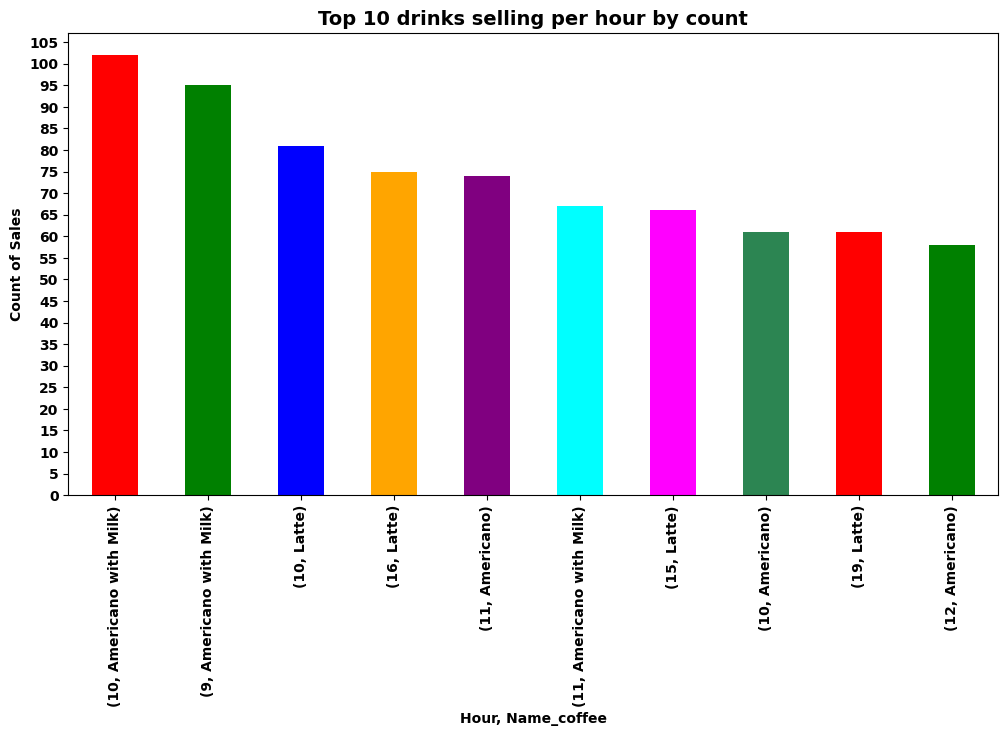

In [32]:
# Top 10 drinks selling per hour by count ?
coffee_by_hour = df.groupby('Hour')['Coffee_name'].value_counts().sort_values(ascending=False).head(10);
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow']
coffee_by_hour.plot(kind='bar',figsize=(12,6),color=colors);
plt.title('Top 10 drinks selling per hour by count',fontsize=14,fontweight='bold')
plt.yticks(np.arange(0,coffee_by_hour.max()+5,5),fontweight='bold');
plt.xticks(fontweight='bold');
plt.ylabel('Count of Sales',fontweight='bold')
plt.xlabel('Hour, Name_coffee',fontweight='bold')

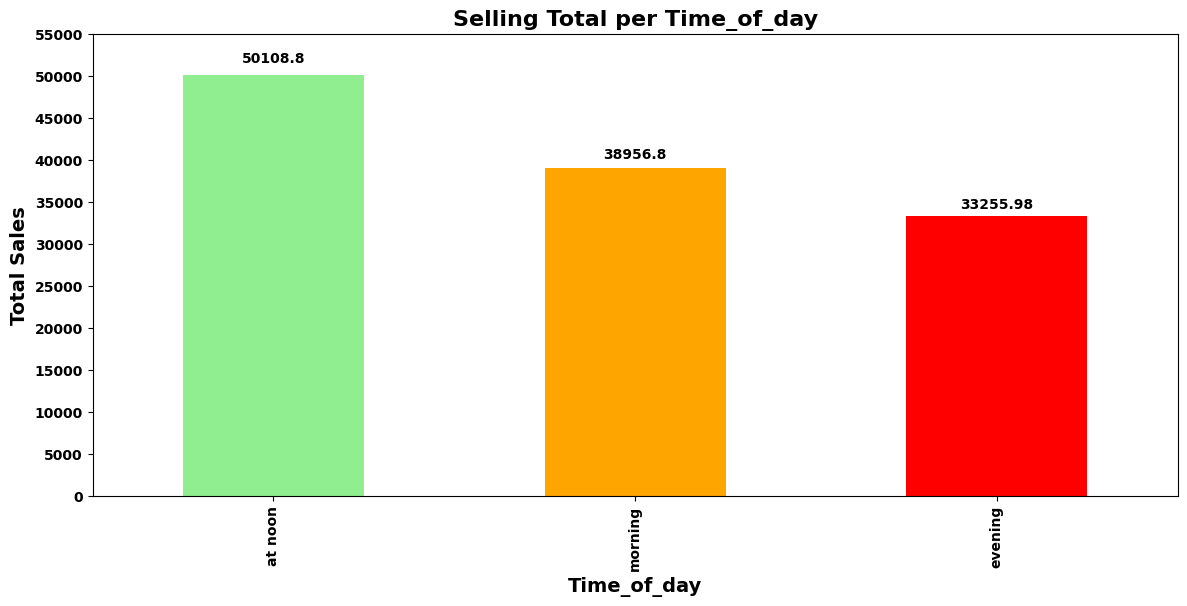

In [17]:
# Selling Total per Time_of_day ?
time_of_day_sales = df.groupby('Time_of_day')['Money'].sum().sort_values(ascending=False)
time_of_day_sales.plot(kind='bar', figsize=(14, 6), color=['lightgreen', 'orange', 'red'])
plt.title('Selling Total per Time_of_day',fontsize=16,fontweight='bold')
plt.yticks(np.arange(0, time_of_day_sales.max() + 5000, 5000), fontweight='bold')
plt.xticks(fontweight='bold');
plt.xlabel('Time_of_day',fontsize=14,fontweight='bold');
plt.ylabel('Total Sales',fontsize=14,fontweight='bold');
for i, val in enumerate(time_of_day_sales) :
    plt.text(i,val + val * 0.03, f"{round(val,2)}",ha='center',fontweight='bold')

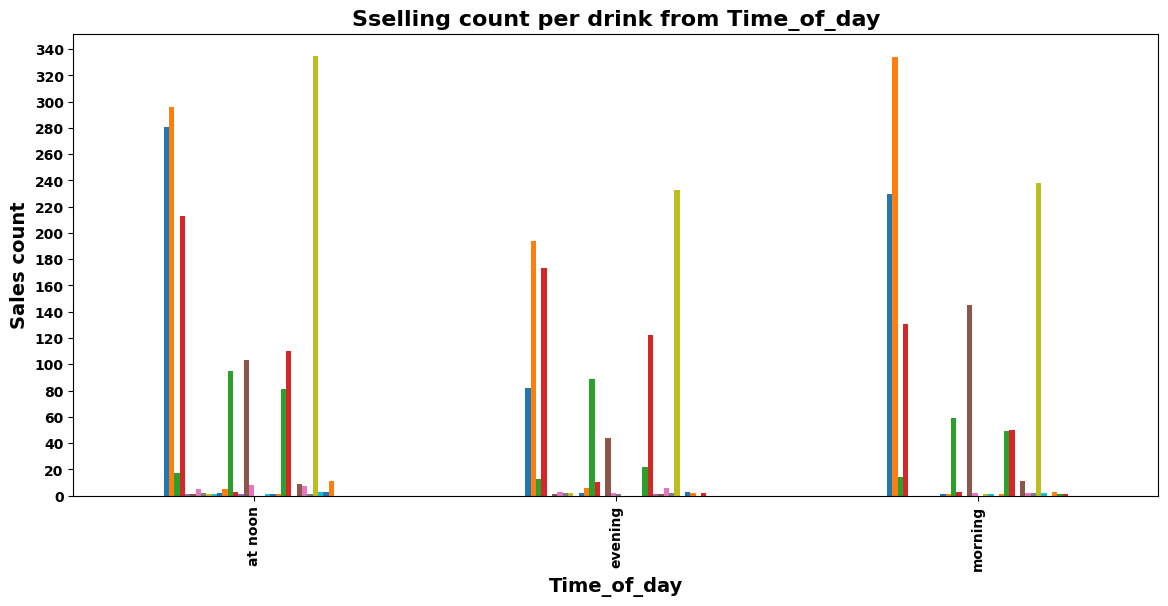

In [18]:
# selling count per drink from Time_of_day ?
time_of_date = df.groupby('Coffee_name')['Time_of_day'].value_counts()
time_of_date = time_of_date.reset_index(name='Count')
time_of_date.pivot(index='Time_of_day', columns='Coffee_name', values='Count').plot(kind='bar', figsize=(14,6));
plt.title('Sselling count per drink from Time_of_day',fontsize=16,fontweight='bold')
plt.yticks(np.arange(0, time_of_date['Count'].max() + 20, 20),fontweight='bold');
plt.xticks(fontweight='bold');
plt.xlabel('Time_of_day',fontsize=14,fontweight='bold')
plt.ylabel('Sales count',fontsize=14,fontweight='bold')
plt.legend().set_visible(False)

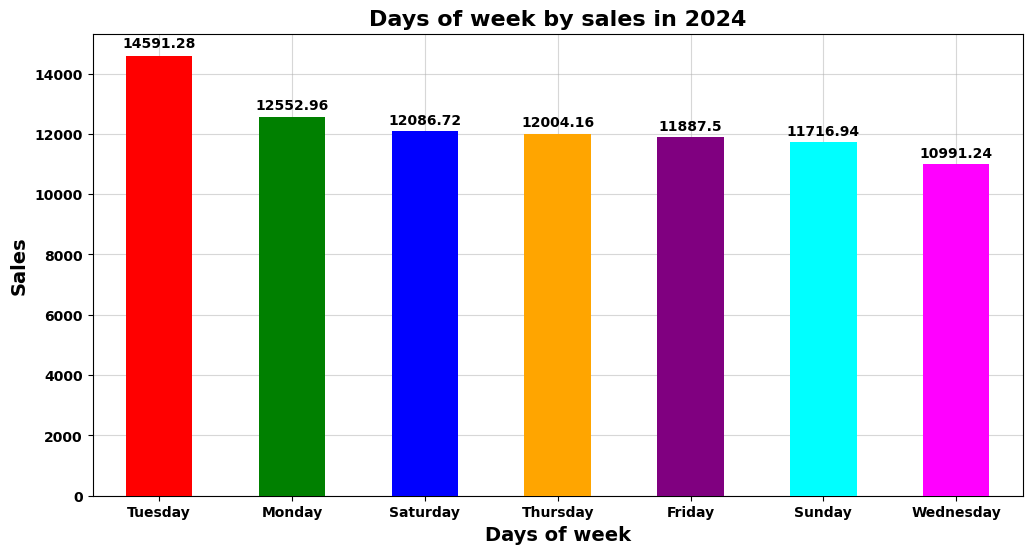

In [43]:
# Days of week by sales in 2024 ?
df_2024 = df[df['Date'].dt.year == 2024]
df_2024 = df_2024.groupby('Day_of_week')['Money'].sum().sort_values(ascending=False);
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', '#2c8552']
df_2024.plot(kind='bar',figsize=(12, 6),color=colors,zorder=3);
plt.grid(alpha=0.5)
for i, val in enumerate(df_2024) :
    plt.text(i,val + val * 0.02, f"{round(val,2)}", ha='center',fontweight='bold')
plt.title('Days of week by sales in 2024',fontsize=16,fontweight='bold')
plt.xlabel('Days of week',fontsize=14,fontweight='bold');
plt.ylabel('Sales',fontsize=14,fontweight='bold');
plt.xticks(fontsize=10,fontweight='bold',rotation=0);
plt.yticks(fontsize=10,fontweight='bold');

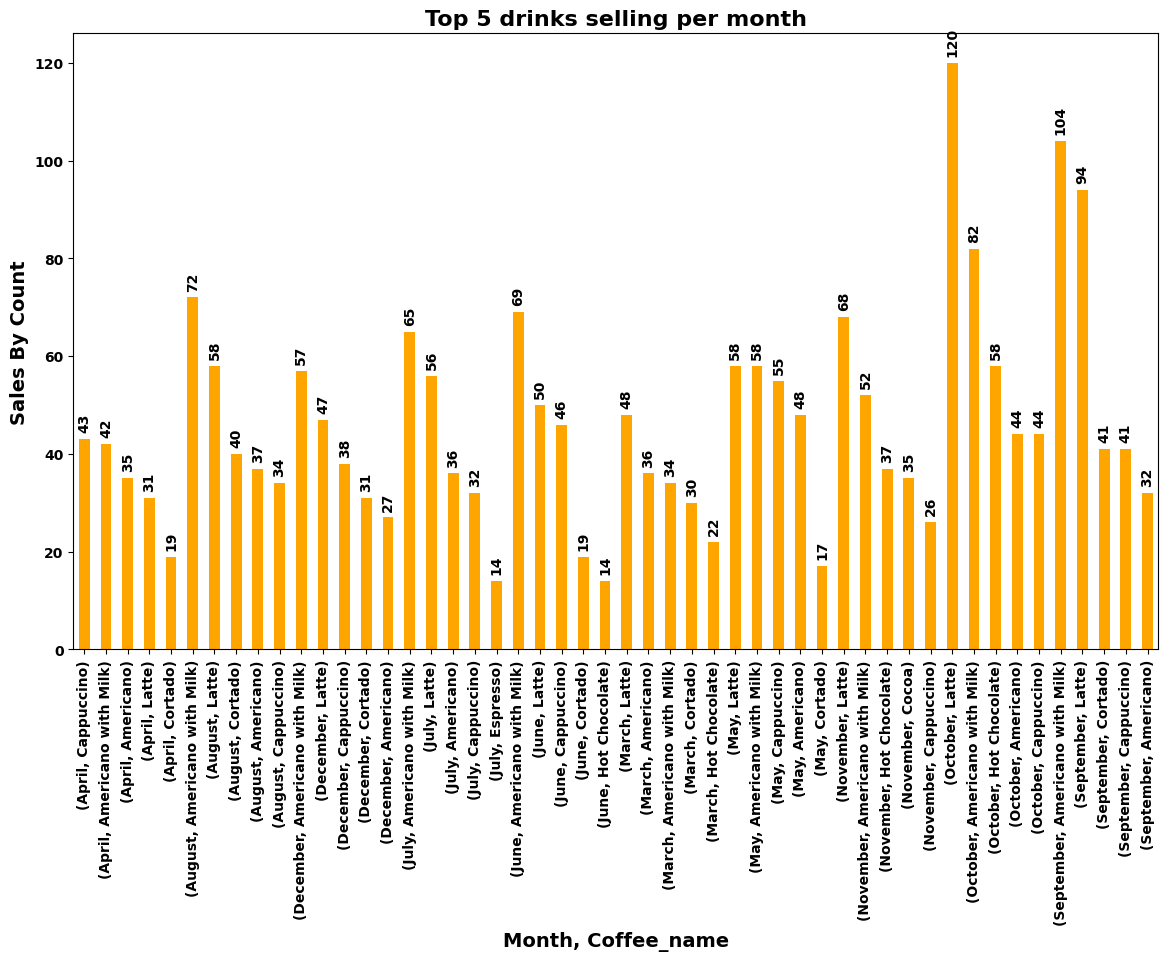

In [42]:
# Top 5 drinks selling per month ?
df_2024 = df[df['Date'].dt.year == 2024]
top_5_month = df_2024.groupby('Month')['Coffee_name'].apply(lambda x : x.value_counts().head())
top_5_month = pd.DataFrame(top_5_month)
ax = top_5_month.plot(kind='bar', figsize=(14, 8),color= 'orange');
for container in ax.containers :
    for bar in container :
        height = bar.get_height()
        if height > 0 :
            ax.text (
                bar.get_x() + bar.get_width() / 2,
                height + 2,
                f"{round(height,2)}",
                ha = 'center',
                fontsize = 10,
                fontweight ='bold',
                rotation = 90 )
plt.xticks(fontweight='bold');
plt.yticks(fontweight='bold');
plt.title('Top 5 drinks selling per month',fontsize=16,fontweight='bold')
plt.xlabel('Month, Coffee_name',fontsize=14,fontweight='bold')
plt.ylabel('Sales By Count',fontsize=14,fontweight='bold');
plt.legend().set_visible(False)

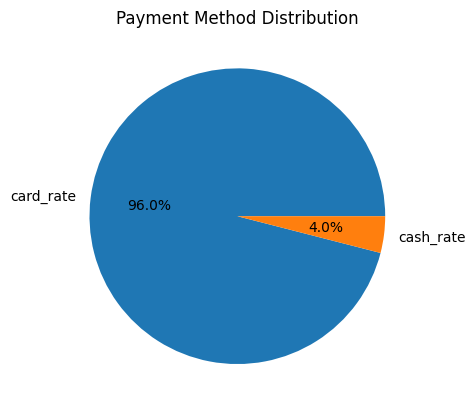

In [25]:
# Calculating the percentage of cash and card according to the total ?
count = len(df['Payment_type'])
card = df['Payment_type'].apply(lambda x: x == 'card').sum()
cash = df['Payment_type'].apply(lambda x: x == 'cash').sum()
card_rate = round(card / count,2) * 100
cash_rate = round(cash / count,2) * 100
plt.pie([card_rate ,cash_rate ],labels=['card_rate','cash_rate'],autopct='%1.1f%%');
plt.title('Payment Method Distribution');

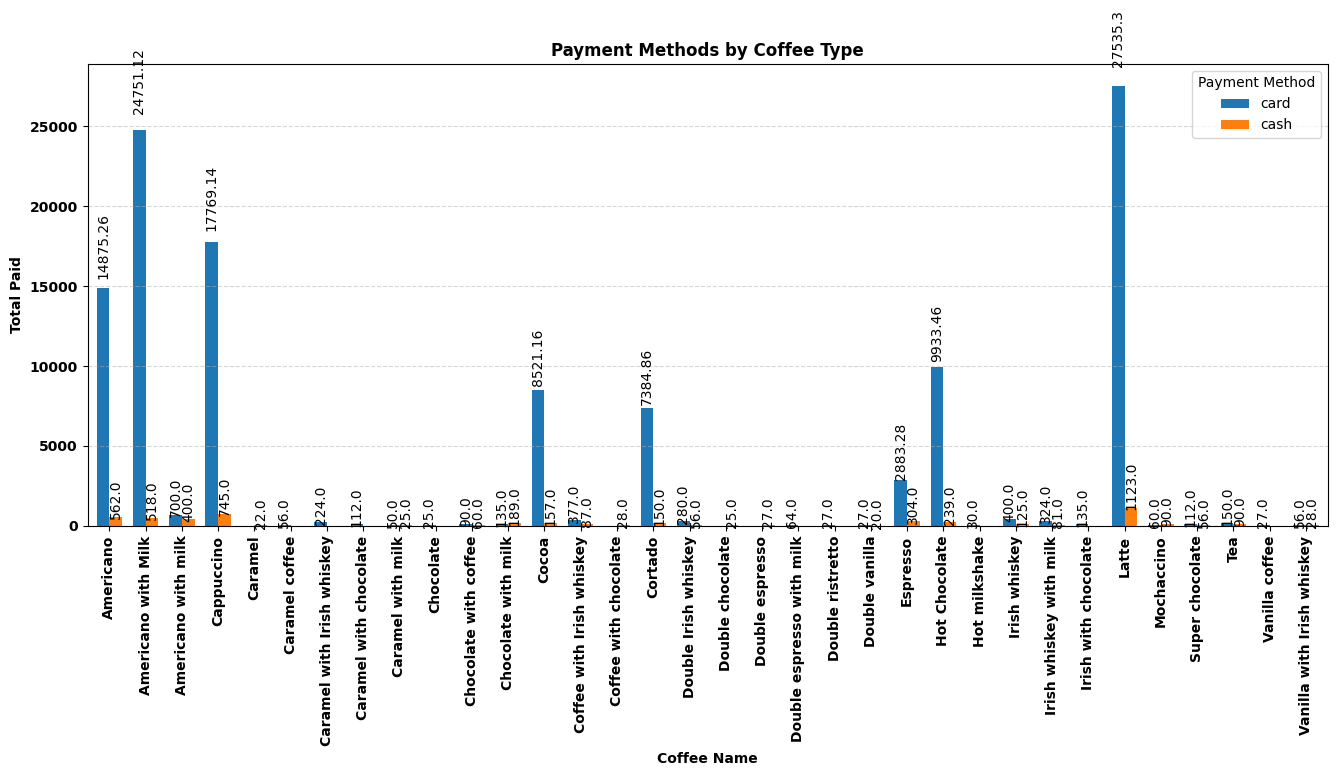

In [33]:
# total paid cash & card ?
total_paid = df.groupby(['Coffee_name', 'Payment_type'])['Money'].sum().unstack(fill_value=0)
ax = total_paid.plot(kind='bar', figsize=(16, 6),width=0.7);
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + height * 0.05,
                f"{round(height, 2)}",
                ha='center', fontsize=10, rotation=90
            )
plt.title('Payment Methods by Coffee Type',fontweight='bold')
plt.xlabel('Coffee Name',fontweight='bold')
plt.ylabel('Total Paid',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(title='Payment Method')
plt.grid(axis='y', linestyle='--', alpha=0.5)

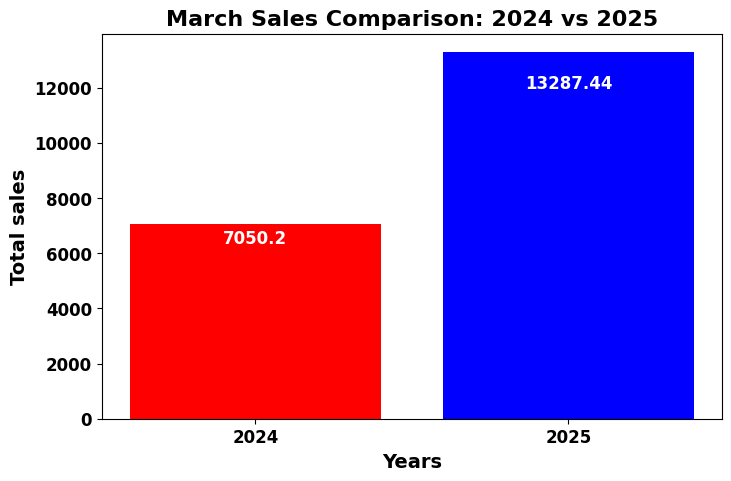

In [29]:
# Analysis of March Sales Variation Between 2024 and 2025 ?
df_2024_March = df[(df['Date'].dt.year == 2024) & (df['Date'].dt.month_name() == 'March')]['Money'].sum()
df_2025_March = df[(df['Date'].dt.year == 2025) & (df['Date'].dt.month_name() == 'March')]['Money'].sum()
round(df_2024_March,2)
round(df_2025_March,2)
change_percentage = ((df_2025_March - df_2024_March) / df_2024_March) * 100
rate = f"{round(change_percentage,2)}%"
years = ['2024', '2025']
sales = [df_2024_March, df_2025_March]
plt.figure(figsize=(8, 5))
bars = plt.bar(years, sales, color=['r', 'b'])
for i, val in enumerate(sales) :
    plt.text(i, val - val * 0.1, f"{round(val, 2)}", ha='center',fontsize=12, fontweight='bold',color='w')
plt.title('March Sales Comparison: 2024 vs 2025',fontsize=16, fontweight='bold')
plt.xlabel('Years',fontsize=14, fontweight='bold')
plt.ylabel('Total sales',fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold');
plt.yticks(fontsize=12, fontweight='bold');